<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 4 (Clustering)</font></h1>

------------------------------------------------

# Kelompok 3 - PYTN KS 014

Nurul Fajriyah Al Maulidiyah  : PYTN-KS14-001 <br>
Fransisca Mulya Sari          : PYTN-KS14-011 <br>

MSIB Kampus Merdeka Batch 4 (Mei, 2023)

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Marketing merupakan komponen yang sangat penting untuk pertumbuhan dan keberlanjutan pada bisnis apa pun. Namun, salah satu masalah utama bagi profesional marketing adalah mengenal pelanggan dan mengidentifikasi kebutuhan mereka. Oleh karena itu, pengelompokan pelanggan dibutuhkan untuk menentukan strategi pemasaran, khususnya pada pelanggan kartu kredit.

Credit card customer dataset berisi tentang kebiasaan pembelian dan pembayaran pelanggan, seperti seberapa sering pelanggan melakukan pembelian cash atau cicilan, atau seberapa sering mereka melakukan penarikan tunai, berapa banyak pembayaran yang dilakukan, dll. Dengan memeriksa setiap pelanggan, dapat ditemukan jenis pembelian apa yang ia minati, atau apakah dia lebih suka penarikan tunai daripada pembelian. 

Metode statistik dan pembelajaran machine learning menggunakan konsep clustering akan digunakan untuk mengelompokkan pelanggan akan dibandingkan dalam project ini. Dataset yang digunakan berisi transaksi pengguna kartu kredit sebanyak 8950 orang selama 6 bulan dengan 18 variabel.  


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam pengelompokan pelanggan kartu kredit
- Untuk membuat beberapa model yang dianggap paling sesuai dengan konsep clustering sehingga diperoleh pengelompokan yang tepat
- Untuk mengelompokkan pelanggan kartu kredit berdasarkan faktor-faktor yang mempengaruhinya menggunakan konsep clustering

# B. Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# C. Data Loading
Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

## C.1. Memanggil dataset

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Keterangan dataset:**

Dataset ini berisi 18 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri dan dapat dikelompokkan sebagai berikut:

1. Balance
    - `BALANCE` = Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian
    - `BALANCE_FREQUENCY` = Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1:sering diperbarui, 0:tidak sering diperbarui)

2. Purchases
    - `PURCHASES` = Jumlah pembelian yang dilakukan dari akun
    - `ONEOFF_PURCHASES` = Jumlah pembelian maksimum dilakukan dalam sekali jalan
    - `INSTALLMENTS_PURCHASES` = Jumlah pembelian yang dilakukan secara mencicil

3. Purchases Frequency
    - `PURCHASES_FREQUENCY` Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1:sering dibeli, 0:tidak sering dibeli)
    - `ONEOFF_PURCHASES_FREQUENCY` = Seberapa sering Pembelian terjadi dalam sekali jalan (1:sering dibeli, 0:tidak sering dibeli)
    - `PURCHASES_INSTALLMENTS_FREQUENCY` = Seberapa sering pembelian dengan mencicil dilakukan (1:sering dilakukan, 0:tidak sering dilakukan)
    - `PURCHASESTRX` = Jumlah transaksi pembelian yang dilakukan

4. Cash Advance
    - `CASHADVANCE` = Uang muka yang diberikan oleh pengguna
    - `CASHADVANCE_FREQUENCY` Seberapa sering uang muka dibayarkan
    - `CASH_ADVANCE_TRX` = Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

5. Payments
    - `PAYMENTS` = Jumlah Pembayaran yang dilakukan oleh pengguna
    - `MINIMUM_PAYMENTS` = Jumlah minimum pembayaran yang dilakukan oleh pengguna
    - `PRC_FULL_PAYMENT` = Persentase pembayaran penuh yang dibayarkan oleh pengguna

6. Lainnya
    - `CUST_ID` = Identifikasi pemegang Kartu Kredit (Categorical)
    - `CREDIT_LIMIT` = Batas Kartu Kredit untuk pengguna
    - `TENURE` = Masa berlaku layanan kartu kredit untuk pengguna

## C.2. Melihat ukuran data

In [3]:
df.shape

(8950, 18)

## C.3. Deskriptif Statistik

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## C.4. Mengecek info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# D. Data Preprocessing
Data pre-processing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan data mining.

## D.1. Menghapus kolom yang tidak diperlukan
Customer ID tampaknya menjadi id unik untuk setiap pelanggan dan tidak akan menjadi peran apa pun dalam menentukan cluster

In [6]:
df.drop('CUST_ID', axis = 1,inplace= True)

## D.2. Merubah nama kolom menjadi lowercase

In [7]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

## D.3. Merubah tipe data menjadi integer
Kolom `balance_frequency`, `purchases_frequency`, `oneoff_purchases_frequency`, dan `purchases_installments_frequency` seharusnya memiliki skor antara 0 dan 1 (sering atau tidak sering). Akan tetapi, pada dataset masih terdapat banyak nilai yang tidak sesuai. Oleh karena itu, tipe datanya akan dirubah menjadi integer

In [9]:
df['balance_frequency'] = df['balance_frequency'].astype('int64')
df['purchases_frequency'] = df['purchases_frequency'].astype('int64')
df['oneoff_purchases_frequency'] = df['oneoff_purchases_frequency'].astype('int64')
df['purchases_installments_frequency'] = df['purchases_installments_frequency'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   int64  
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   int64  
 7   oneoff_purchases_frequency        8950 non-null   int64  
 8   purchases_installments_frequency  8950 non-null   int64  
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

## D.4. Pengecekan data duplikat
Mengecek data duplikat pada keseluruhan data df.

In [11]:
df.duplicated().sum()

0

## D.5. Pengecekan missing value

In [12]:
df.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [13]:
df.isna().mean()*100

balance                             0.000000
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        0.000000
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.011173
payments                            0.000000
minimum_payments                    3.497207
prc_full_payment                    0.000000
tenure                              0.000000
dtype: float64

## D.6. Mengatasi Missing Value
Fitur credit_limit hanya memiliki 0,01% atau 1 data yang memiliki missing value. Oleh karena itu dapat langsung dihapus menggunakan dropna.

In [14]:
df.dropna(subset=['credit_limit'], inplace=True)

Untuk menangani missing value pada fitur minimum_payments yaitu dilakukan fillna menggunakan median. Hal tersebut karena median memberikan estimasi yang lebih baik dari central tendency dari fitur ini.

In [15]:
df['minimum_payments'] = df['minimum_payments'].fillna(df['minimum_payments'].median())

In [16]:
df.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

Setelah proses dropna dan fillna dengan median, dapat dilihat bahwa sudah tidak ada missing value pada dataset

# E. Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

## E.2. Visualisasi Data
### 1. Bagaimana perbandingan skewed dari setiap fitur?

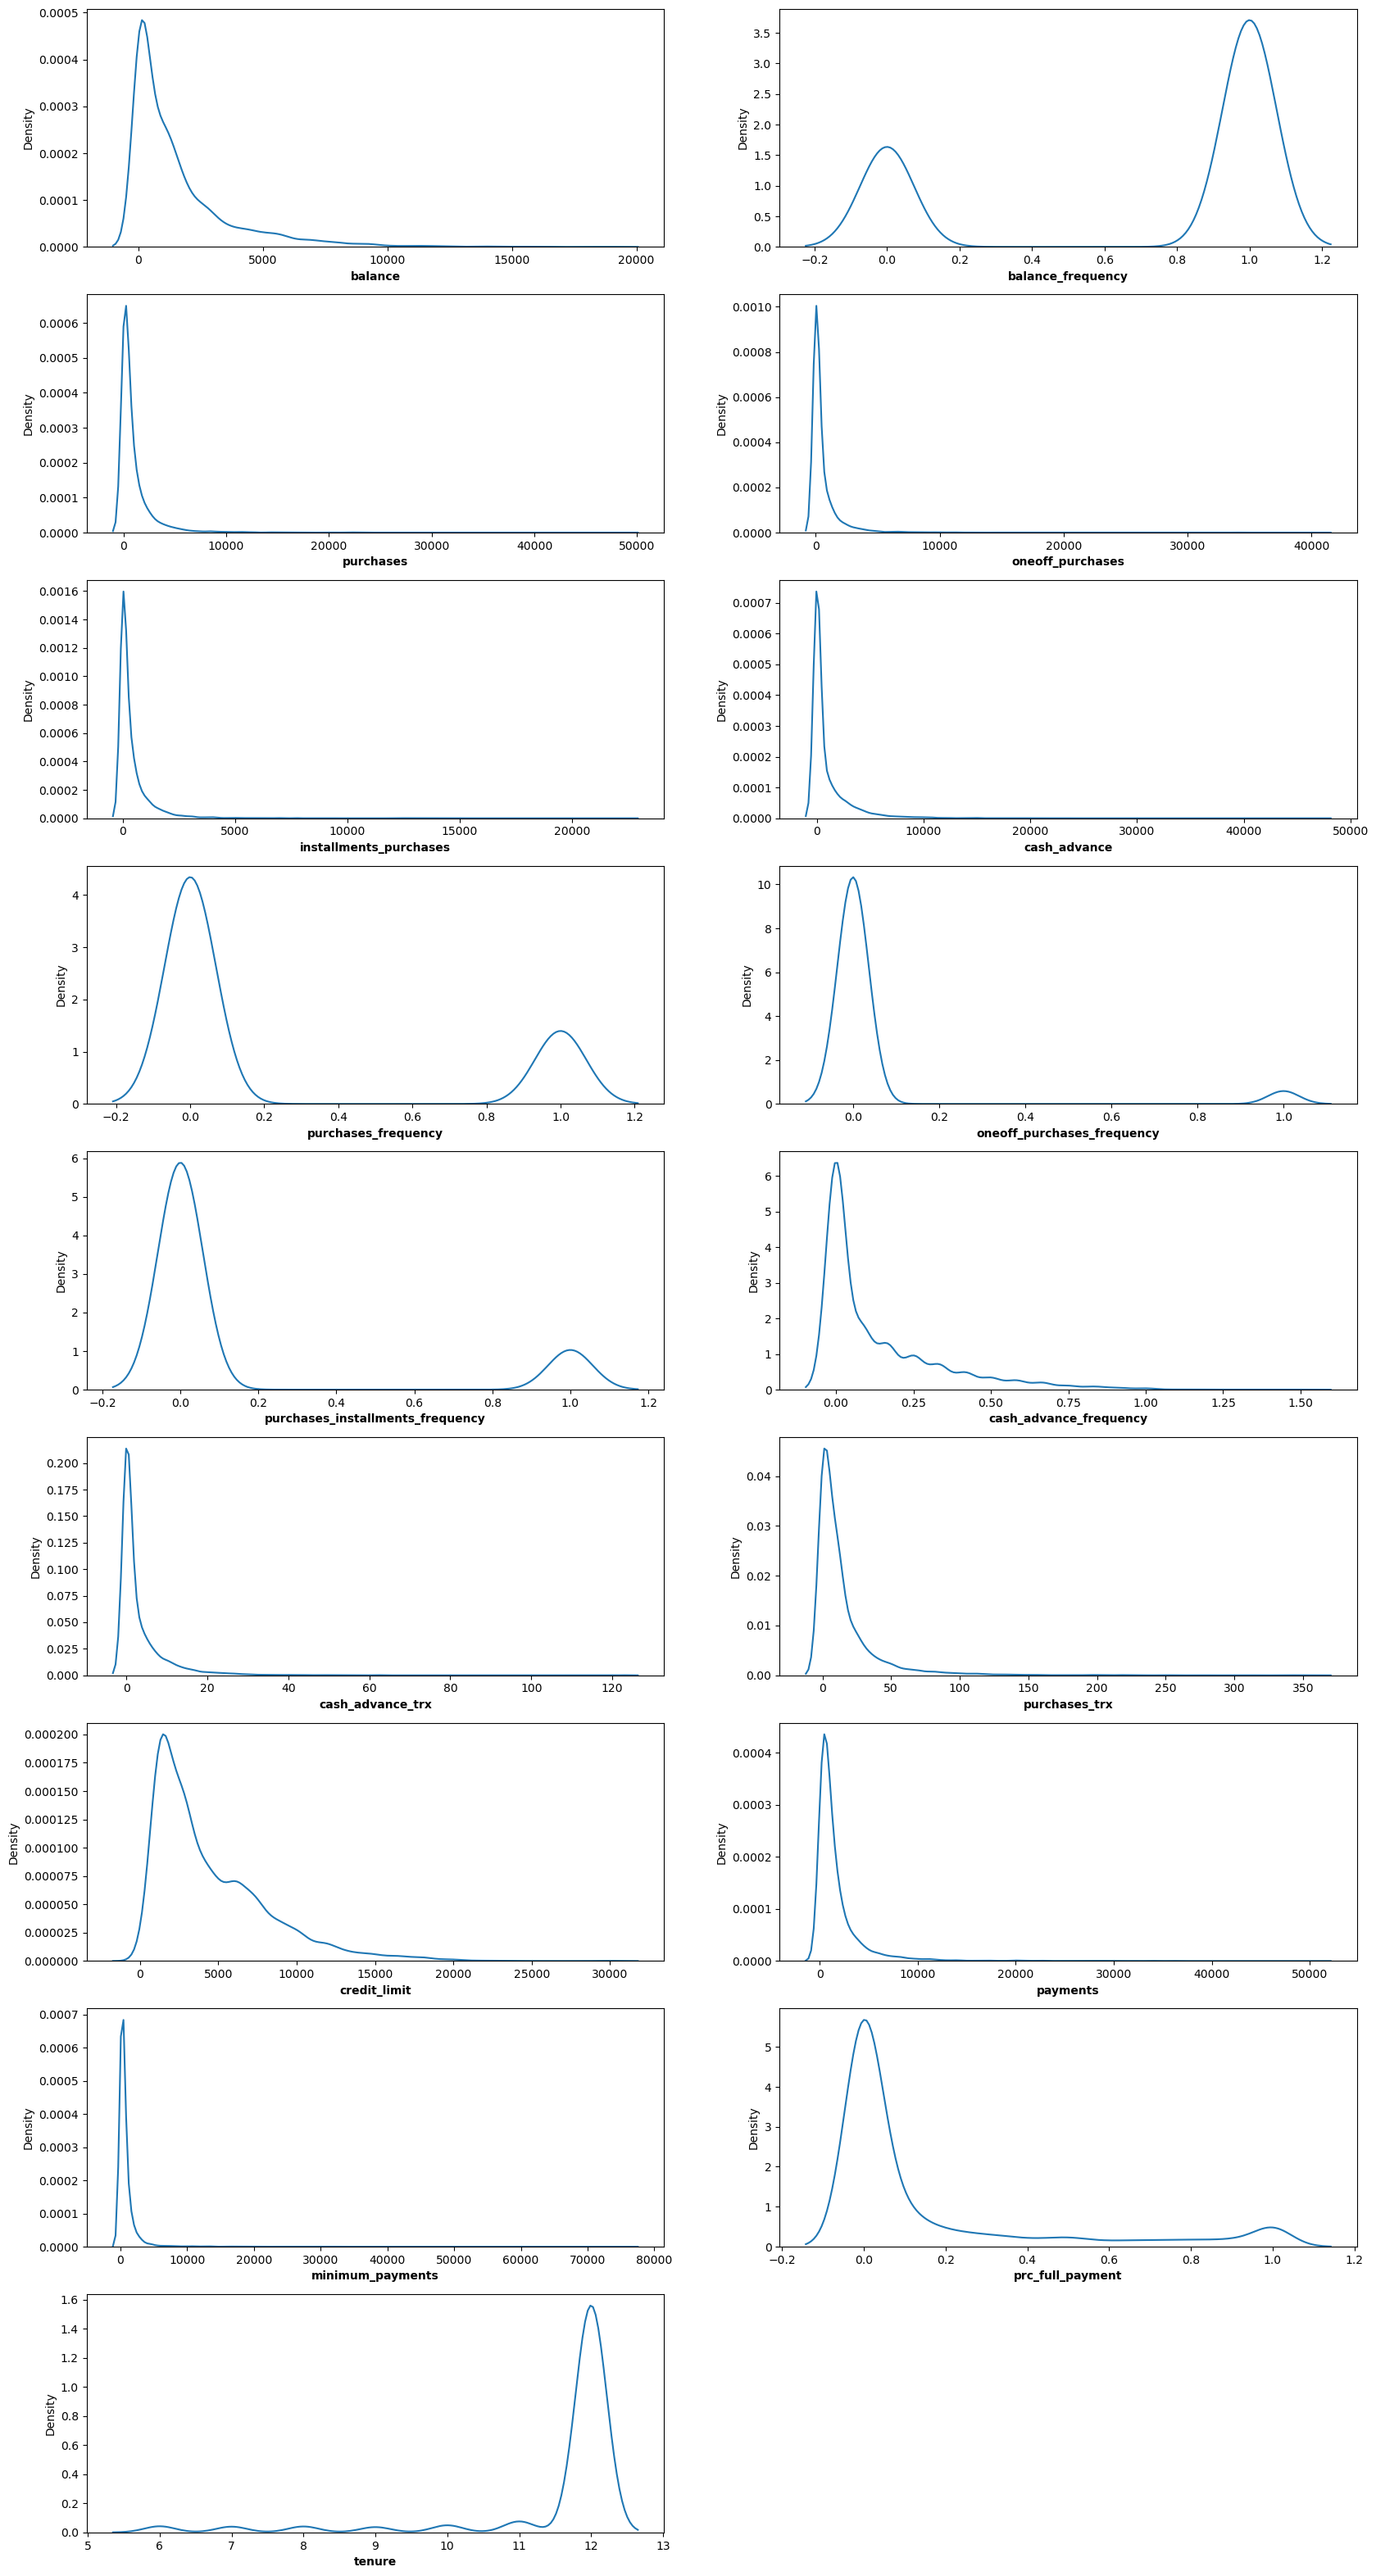

In [17]:
plt.figure(figsize=(20,40))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col, fontsize=10, fontweight='bold')
        
plt.show()

**Kesimpulan:**

Ternyata terdapat banyak skewness dan sangat bervariasi, tetapi mayoritas berdistribusi left skewed. Skewness bervariasi dikarenakan ada beberapa pelanggan yang melakukan transaksi dalam jumlah yang sangat tinggi. 

### 2. Pembelian berdasarkan jangka waktu penggunaan layanan kartu kredit

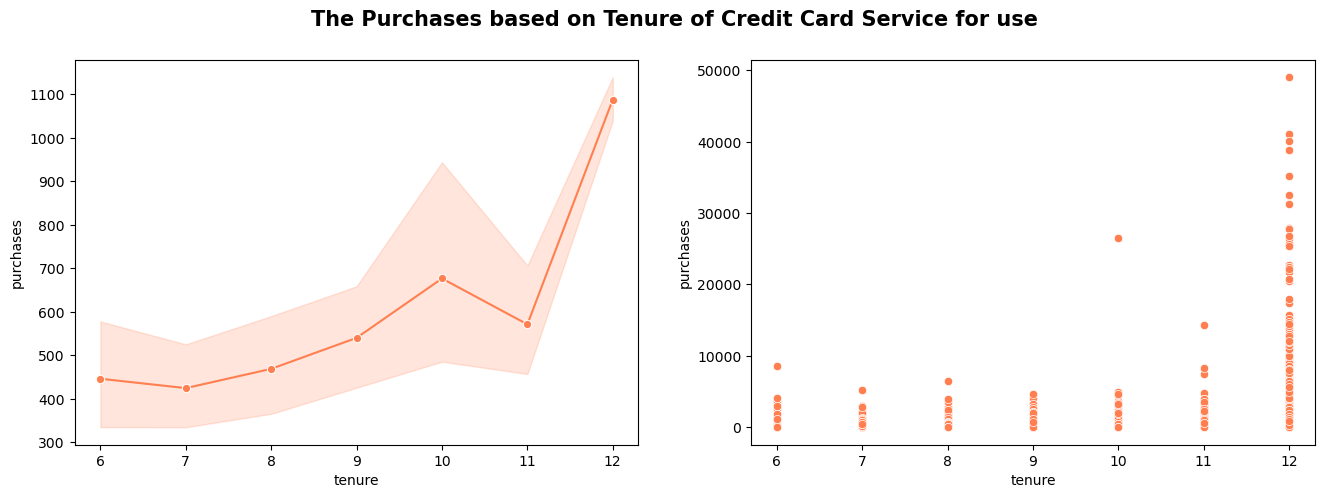

In [18]:
plt.figure(figsize=(16,5))
plt.suptitle('The Purchases based on Tenure of Credit Card Service for use', fontweight='bold', fontsize=15)

# Line plot
plt.subplot(1,2,1)
sns.lineplot(x='tenure', y='purchases', data=df, color='coral', marker="o")

# Scatter plot
plt.subplot(1,2,2)
sns.scatterplot(x='tenure', y='purchases', data=df, color='coral');

**Kesimpulan:** <br>
Berdasarkan visualisasi, dapat dilihat bahwa:
- Jumlah pembelian meningkat berdasarkan masa berlaku penggunaan layanan kartu, tetapi sempat menurun pada masa berlaku 11 bulan
- Jumlah pembelian tertinggi terdapat pada masa berlaku penggunaan layanan kartu kredit selama 12 bulan  

### 3. Bagaimana persebaran pembelian yang dilakukan berdasarkan saldo pelanggan?

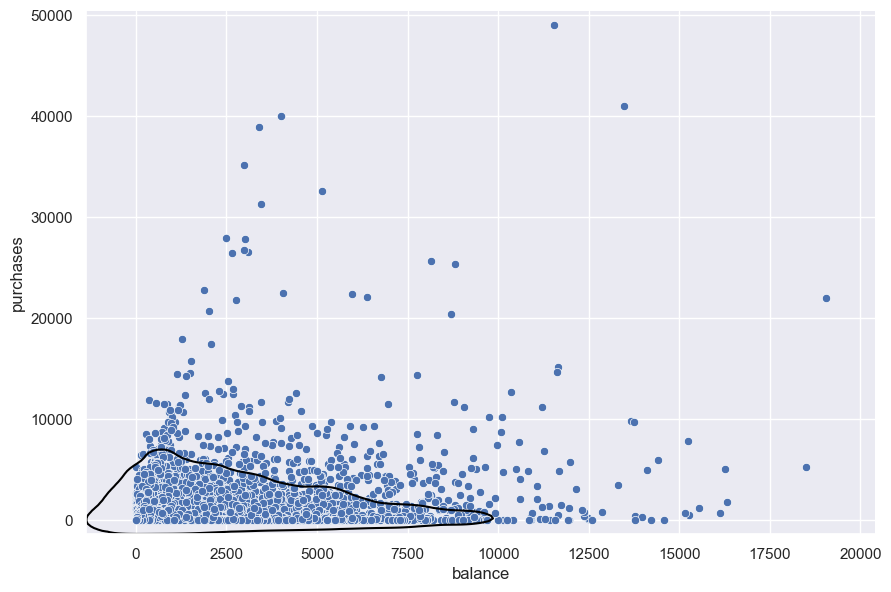

In [71]:
sns.pairplot(data=df, x_vars='balance', y_vars='purchases', 
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='black');

**Kesimpulan:**

Berdasarkan visualisasi diatas, pada kde plot dapat dilihat bahwa sebagian besar pengguna yang tersebar telah melakukan pembelian dibawah 8.000 dan saldo yang tersisa di akun mereka untuk melakukan pembelian yaitu dibawah 10.000.

### 4. Hubungan antara credit limit dan pembayaran berdasarkan frekuensi pembelian

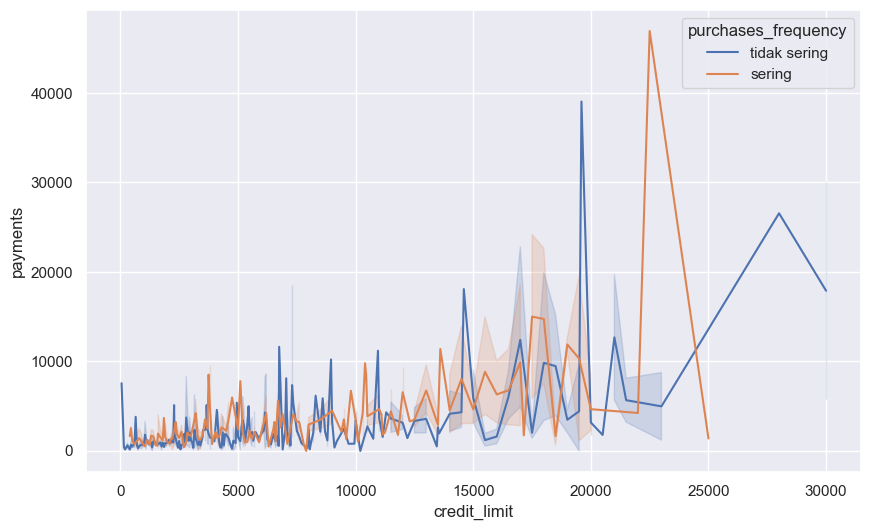

In [70]:
sns.set(rc={'figure.figsize':(10,6)})
frekuensi = df['purchases_frequency'].replace({0:'tidak sering', 1:'sering'})
sns.lineplot(x='credit_limit', y='payments', hue=frekuensi, data=df);

**Kesimpulan:**

Berdasarkan grafik diatas dapat dilihat bahwa 
- Semakin besar credit limit, maka semakin besar pula jumlah pembayaran untuk pembelian yang dilakukan. Artinya, ada korelasi antara credit limit dengan pembayaran. 
- Pembayaran tertinggi yang sering dilakukan untuk pembelian terdapat pada rentang credit limit antara 20.000-25.000.

### 5. Bagaimana frekuensi kasus pembelian yang dilakukan secara mencicil?

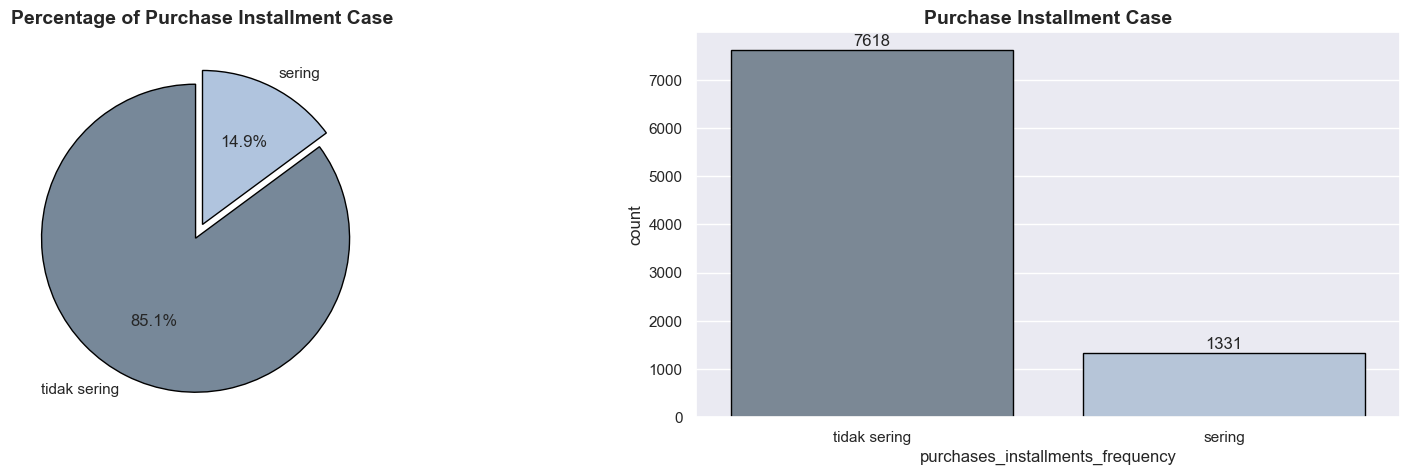

In [80]:
l = list(df['purchases_installments_frequency'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
colors = ['#778899','#B0C4DE']

# pie plot
plt.subplot(1,2,1)
plt.pie(circle, labels = ['tidak sering','sering'],
        autopct='%1.1f%%', startangle = 90, explode = (0.1,0), 
        colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Percentage of Purchase Installment Case', fontsize=14, fontweight='bold');

# bar plot
plt.subplot(1,2,2)
ax = sns.countplot('purchases_installments_frequency', data = df, palette = colors, edgecolor = 'black')
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1, fontsize=12)
ax.set_xticklabels(['tidak sering','sering'])
plt.title('Purchase Installment Case', fontsize=14, fontweight='bold');

plt.show()

**Kesimpulan:**

Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- Pelanggan kartu kredit tidak sering melakukan pembelian yang dilakukan secara mencicil
- Persentase frekuensi pembelian yang dilakukan secara mencicil yaitu 85.1% tidak sering dilakukan dengan total 7.618 kasus dan 14.9% sering dilakukan dengan total 1.331 kasus

### 6. Berapa jumlah total pembelian dan yang dilakukan dengan menggunakan cash advance?

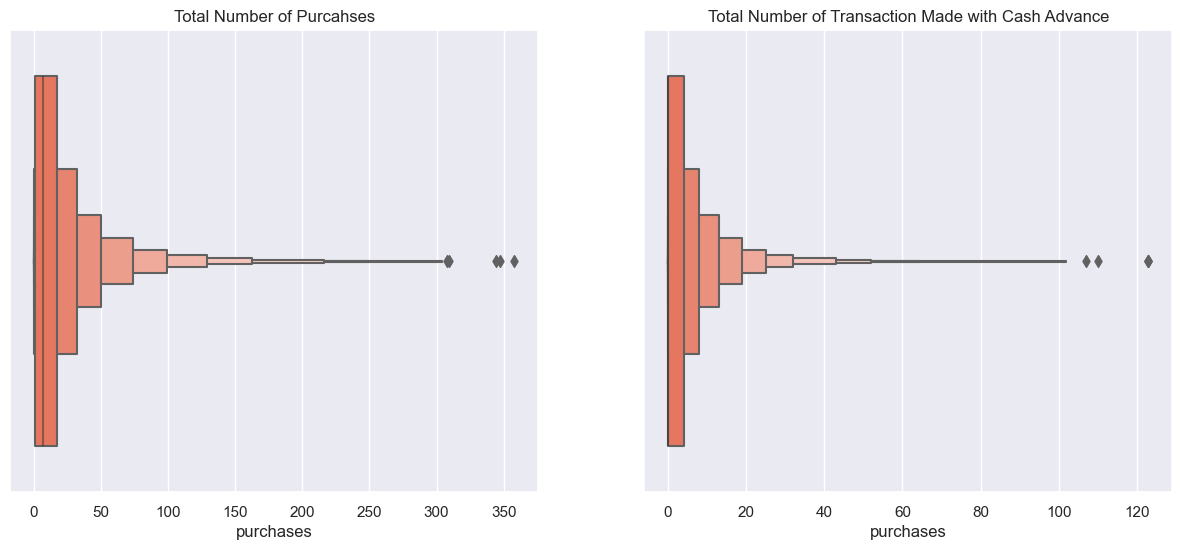

In [100]:
plt.rcParams['figure.figsize'] = (15,6)

plt.subplot(1,2,1)
sns.boxenplot(df['purchases_trx'], palette='Reds')
plt.title('Total Number of Purcahses')
plt.xlabel('purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['cash_advance_trx'], palette='Reds')
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('purchases');

**Kesimpulan:**

Berdasarkan visualisasi boxen plot diatas, dapat diketahui bahwa:
- Sebagian besar pelanggan memiliki jumlah transaksi yang rendah dan hanya ada beberapa pelanggan yang membeli dengan kuantitas tinggi. Hal tersebut dapat diasumsikan bahwa orang menggunakan kartu kredit untuk pemanfaatan kredit dan bukan untuk pembelian.
- Beberapa pelanggan membeli lebih dari 300 kali, akan tetapi pembelian dengan uang muka yang lebih dari 100 kali hanya sedikit.

## E.3. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

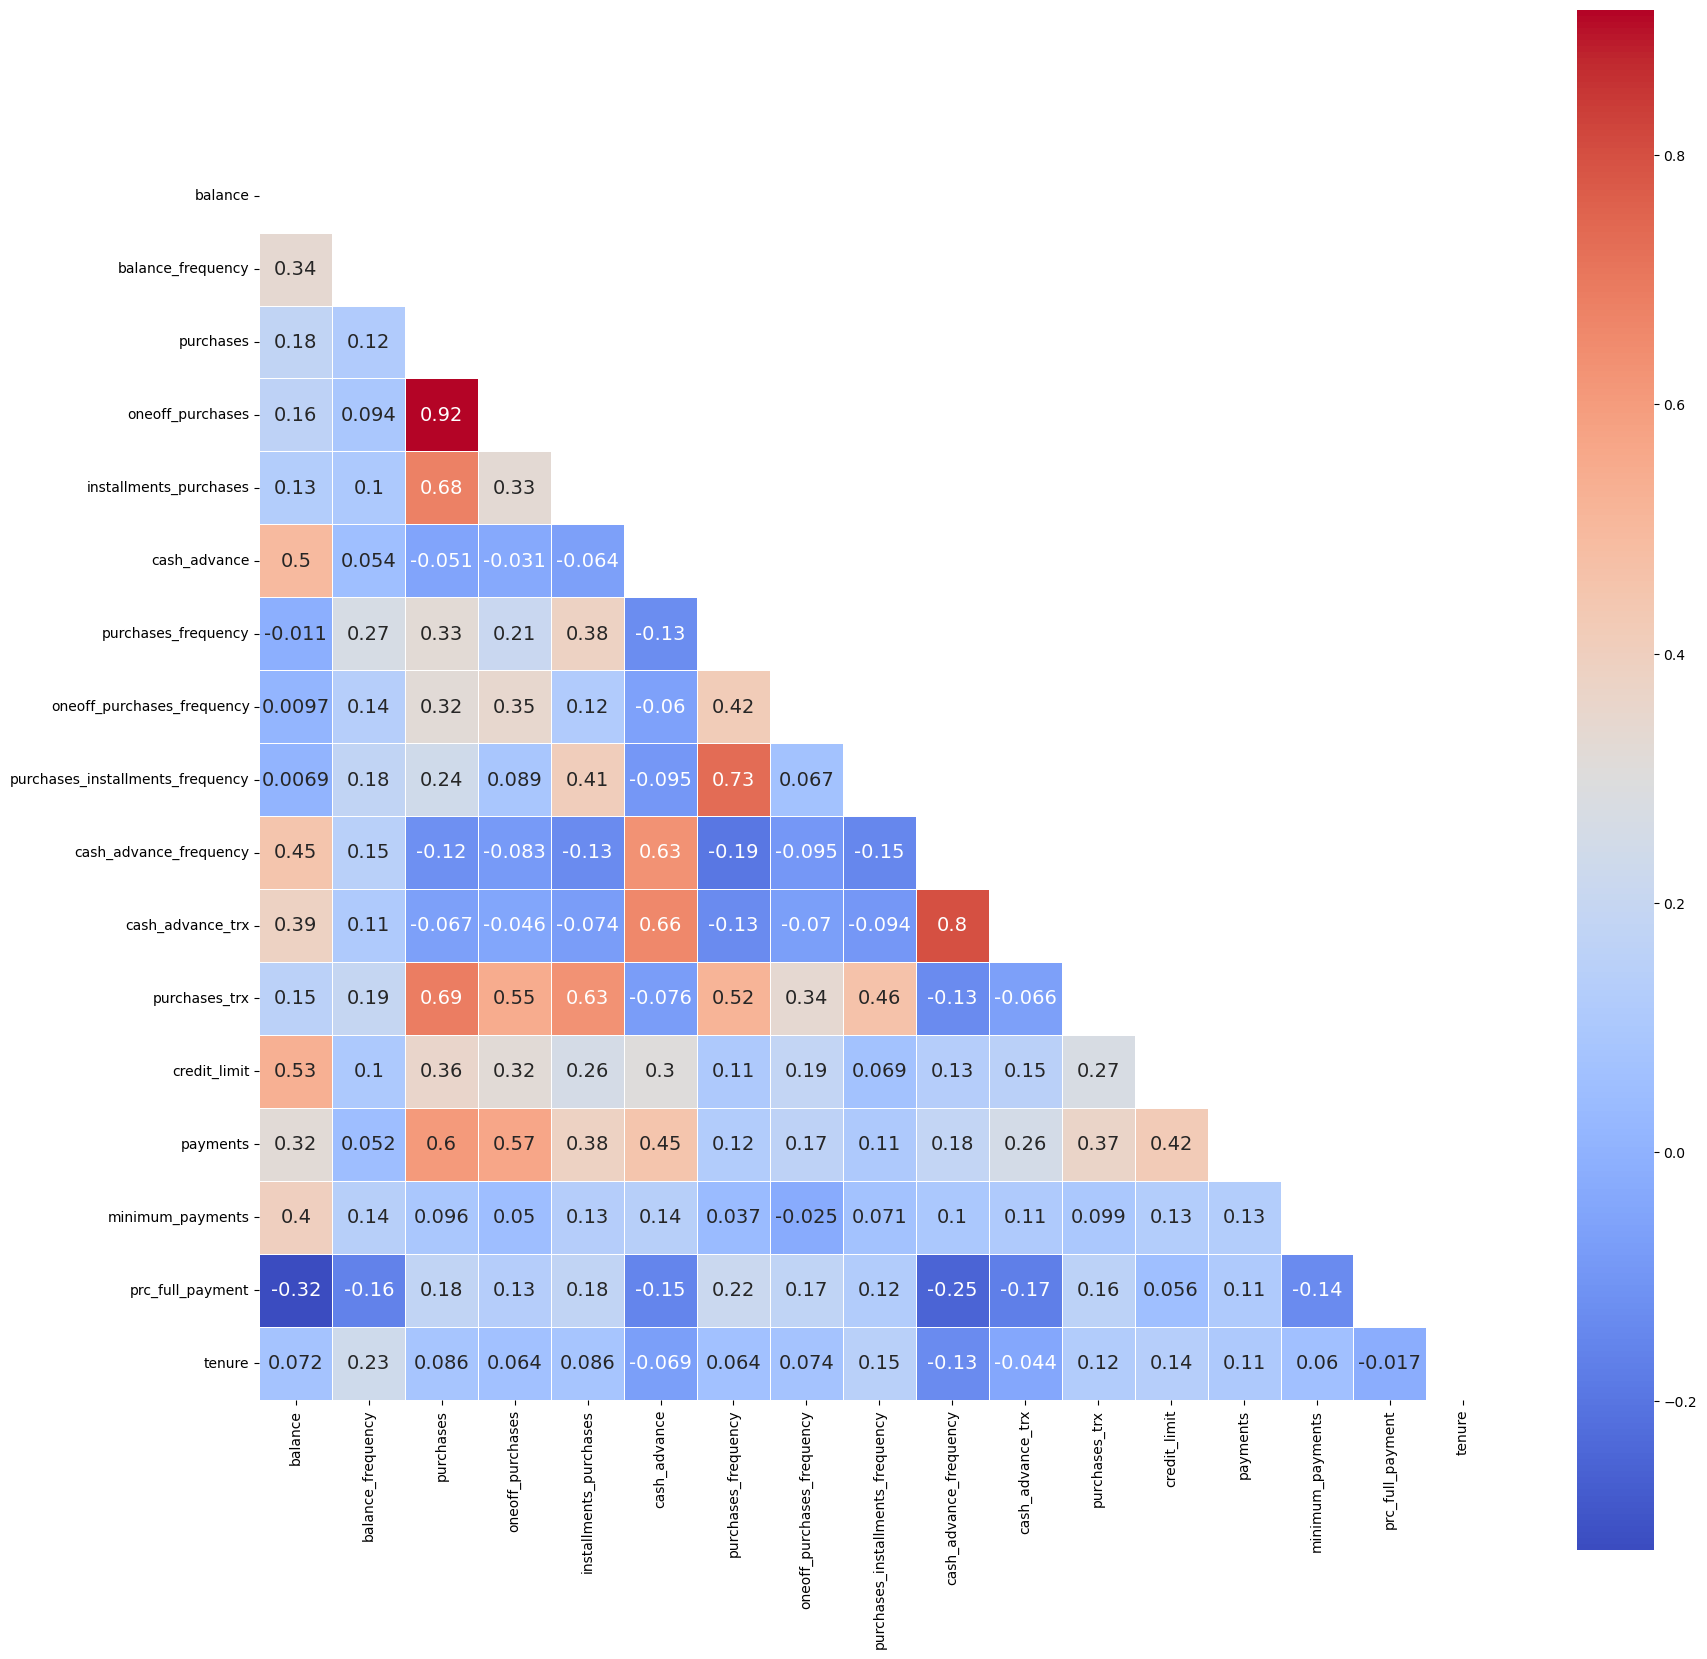

In [20]:
correlation = df.corr(method='pearson')

fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)

# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# Membuat heatmap
sns.heatmap(correlation, cmap='coolwarm', mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14});

plt.show()

**Keterangan:**

Berdasarkan visualisasi heatmap diatas, maka dapat diketahui bahwa terdapat korelasi antar fitur yaitu sebagai berikut:

**Korelasi yang sangat kuat:**<br>
- `oneoff_purchases` dan `purchases` dengan nilai korelasi 0.92. Hal tersebut karena pembelian satu kali merupakan bagian dari pembelian.
- `cash_advance_frequency` dan `cash_advance_trx` dengan nilai korelasi 0,8. Hal tersebut menunjukkan bahwa pembayaran di muka sering terjadi.
- `purchases_installments_frequency` dan `purchases_frequency` dengan nilai korelasi 0.73. Hal tersebut dapat diartikan bahwa pembayaran dengan metode cicilan sering terjadi.

**Korelasi sedang:**<br>
- `purchases` dan `purchases_trx` dengan nilai korelasi 0.69. Hal tersebut menunjukkan bahwa total pembelian terdiri dari banyak transaksi pembelian.
- `installments_purchases` dan `purchases` dengan nilai korelasi 0.68 . Hal tersebut karena pembelian secara mencicil adalah bagian dari pembelian.
- `cash_advance` dan `cash_advance_trx` dengan nilai korelasi 0.66. Hal tersebut menunjukkan bahwa pembayaran di muka terdiri dari banyak transaksi pembayaran uang muka.

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data float untuk dicari central tendency dan Measure of Spread nya.

In [21]:
df_central = df.loc[:,['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'cash_advance_frequency', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment']]
df_central.head()

,balance,purchases,oneoff_purchases,installments_purchases,cash_advance,cash_advance_frequency,credit_limit,payments,minimum_payments,prc_full_payment
0,40.900749,95.40,0.00,95.4,0.000000,0.000000,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.00,0.00,0.0,6442.945483,0.250000,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,773.17,773.17,0.0,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000
3,1666.670542,1499.00,1499.00,0.0,205.788017,0.083333,7500.0,0.000000,312.452292,0.000000
4,817.714335,16.00,16.00,0.0,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000


In [22]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: balance
Mean: 1564.648
Median: 873.680
Modus: 0.000
Range: 19043.139
Variansi: 4332992.015
Standard Deviasi: 2081.584
  
Nama Kolom: purchases
Mean: 1003.317
Median: 361.490
Modus: 0.000
Range: 49039.570
Variansi: 4565605.897
Standard Deviasi: 2136.728
  
Nama Kolom: oneoff_purchases
Mean: 592.504
Median: 38.000
Modus: 0.000
Range: 40761.250
Variansi: 2755496.585
Standard Deviasi: 1659.969
  
Nama Kolom: installments_purchases
Mean: 411.114
Median: 89.000
Modus: 0.000
Range: 22500.000
Variansi: 817899.938
Standard Deviasi: 904.378
  
Nama Kolom: cash_advance
Mean: 978.960
Median: 0.000
Modus: 0.000
Range: 47137.212
Variansi: 4398517.731
Standard Deviasi: 2097.264
  
Nama Kolom: cash_advance_frequency
Mean: 0.135
Median: 0.000
Modus: 0.000
Range: 1.500
Variansi: 0.040
Standard Deviasi: 0.200
  
Nama Kolom: credit_limit
Mean: 4494.449
Median: 3000.000
Modus: 3000.000
Range: 29950.000
Variansi: 13240979.884
Standard Deviasi: 3638.816
  
Nama Kolom: payments
Mean: 1733.337
Medi

# G. Cardinality
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [34]:
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [83]:
print("Number of categories in the variable is:")
df[df.columns].nunique()

Number of categories in the variable is:


balance                             8870
balance_frequency                      2
purchases                           6203
oneoff_purchases                    4014
installments_purchases              4452
cash_advance                        4322
purchases_frequency                    2
oneoff_purchases_frequency             2
purchases_installments_frequency       2
cash_advance_frequency                54
cash_advance_trx                      65
purchases_trx                        173
credit_limit                         205
payments                            8710
minimum_payments                    8636
prc_full_payment                      47
tenure                                 7
dtype: int64

**Keterangan:**

Dapat dilihat bahwa number of categories (unique value) dari berbagai fitur sangat banyak atau biasa disebut dengan istilah high cardinality. Akan tetapi tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality. Hal tersebut karena pelanggan yang melakukan transaksi sangat bervariasi.

# I. Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMax Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# J. Hierarchical Clustering Dendrogram
Visualisasi dendogram membantu untuk memahami struktur hierarki dan hubungan antara klaster atau kelompok data dalam analisis Hierarchical Clustering. Dalam dendrogram, sumbu x menunjukkan data poin, sedangkan sumbu y menunjukkan jarak antara klaster atau kelompok data. Tinggi setiap cabang pada dendrogram menunjukkan jarak atau kesamaan antara klaster atau kelompok data tersebut.

In [30]:
hier_cluster = linkage(data_scaled, method='ward')

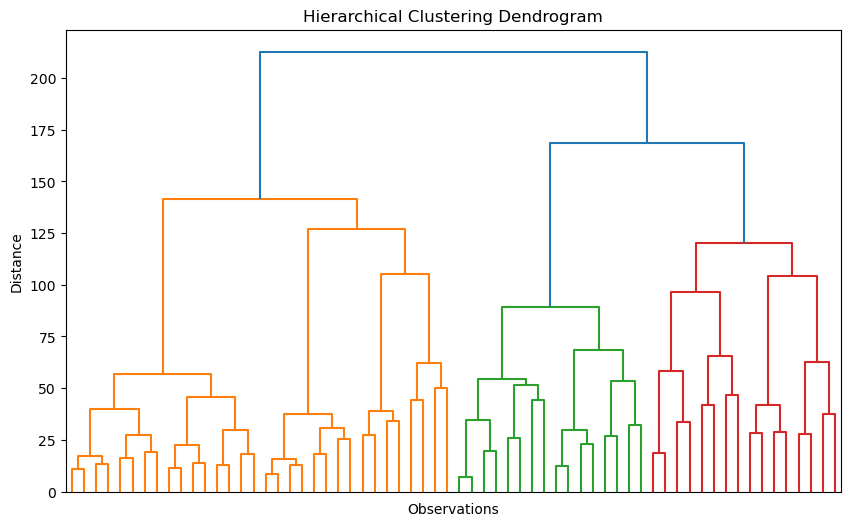

In [31]:
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Berdasarkan hasil visualisasi dendogram diatas, maka dapat diketahui bahwa dataset ini memiliki 4 jumlah cluster atau kelompok.

# K. Modelling
## K.1. K-Means
### K.1.2. Within Cluster Sum of Squares (WCSS) 

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

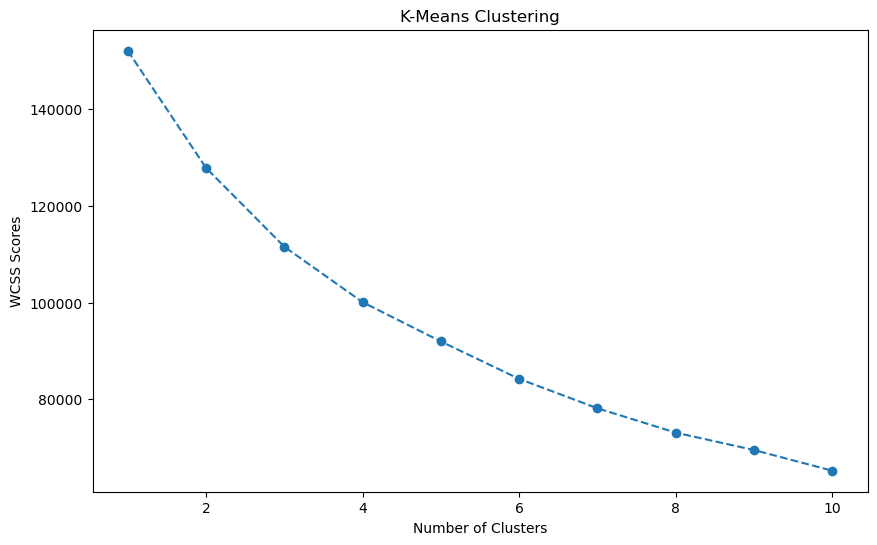

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()

Untuk membuat penilaian berdasarkan dendrogram dan metrik within cluster sum of squares (WCSS), kita dapat menjalankan kmeans lain dengan 4 klaster dan memplot hasilnya. Sedikit lebih sulit untuk menilai karena kita tidak memiliki  'elbow' yang pasti.

# L. Model Improvement
Model Improvement adalah memperbaiki model dengan tujuan untuk meningkatkan akurasi. 

# M. Model Inference
Model inference adalah model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan, ataupun data yang ada pada internet.

Pada model inference ini dibuat dataset yang serupa dengan dataset sebelumnya dengan total 8 kolom yaitu Lokasi,  Temp, CurahHujan, ArahAngin, KecepatanAngin, Kelembapan, Tekanan, dan Hujan. Selanjutnya membuat prediksi menggunakan model yang sudah dijalankan sebelumnya yaitu lr_model dan svm_model untuk mengklasifikasi turunnya hujan (turun hujan atau tidak) pada dataset model_inference.

# P. Kesimpulan Keseluruhan


___

# Q. Deployment